###Importing library

In [20]:
#import library
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [21]:
#loading data
df = pd.read_csv('https://raw.githubusercontent.com/MurwanjaniTejoRiyono/capstone/master/dataset/Crop_recommendation.csv')


In [22]:
acc_value = []
model = []
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'XG Boost'])

### Data split

In [23]:
features = df[["N", "P", "K","temperature", "humidity", "ph", "rainfall"]]
targets = df["label"]
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.20, random_state = 123, stratify = targets)

In [24]:
print(f'Whole Dataset Total: {len(features)}')
print(f'Train dataset Total: {len(x_train)}')
print(f'Test dataset Total: {len(x_test)}')

Whole Dataset Total: 2200
Train dataset Total: 1760
Test dataset Total: 440


### Modelling - K Nearest Neighbour

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
value = knn.predict(x_test)

knn_accuracy = metrics.accuracy_score(y_test, value)
print("KNN Accuracy : ", knn_accuracy)
print("\n", classification_report(y_test,value))

acc_value.append(knn_accuracy)
model.append('K Nearest Neighbours')

KNN Accuracy :  0.9840909090909091

               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.80      1.00      0.89        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.91      1.00      0.95        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      0.90      0.95        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00 

### Modelling - Random Forest

In [27]:
RF = RandomForestClassifier(n_estimators=150,max_depth=8,random_state=42)
RF.fit(x_train,y_train)
value = RF.predict(x_test)

RF_accuracy = metrics.accuracy_score(y_test, value)
print("Random Forest Accuracy is: ", RF_accuracy)
print("\n", classification_report(y_test,value))

acc_value.append(RF_accuracy)
model.append('Random Forest')

Random Forest Accuracy is:  0.9931818181818182

               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.87      1.00      0.93        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.0

### Modelling - XG Boost

In [28]:
XB = xgb.XGBClassifier()
XB.fit(x_train,y_train)
value = XB.predict(x_test)

XB_accuracy = metrics.accuracy_score(y_test, value);
print("XGBoost Accuracy is: ", XB_accuracy)
print("\n", classification_report(y_test,value))

acc_value.append(XB_accuracy)
model.append('XG Boost')

XGBoost Accuracy is:  0.9931818181818182

               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.87      1.00      0.93        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00     

### Evaluate dan comparing all models

In [29]:
score = cross_val_score(knn,features,targets,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.96590909 0.975      0.97954545 0.96590909 0.97045455]


In [30]:
score = cross_val_score(RF,features,targets,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99318182 0.99318182 0.99090909 0.98181818]


In [31]:
score = cross_val_score(XB,features,targets,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.98636364 0.99318182 0.99545455 0.99090909 0.98409091]


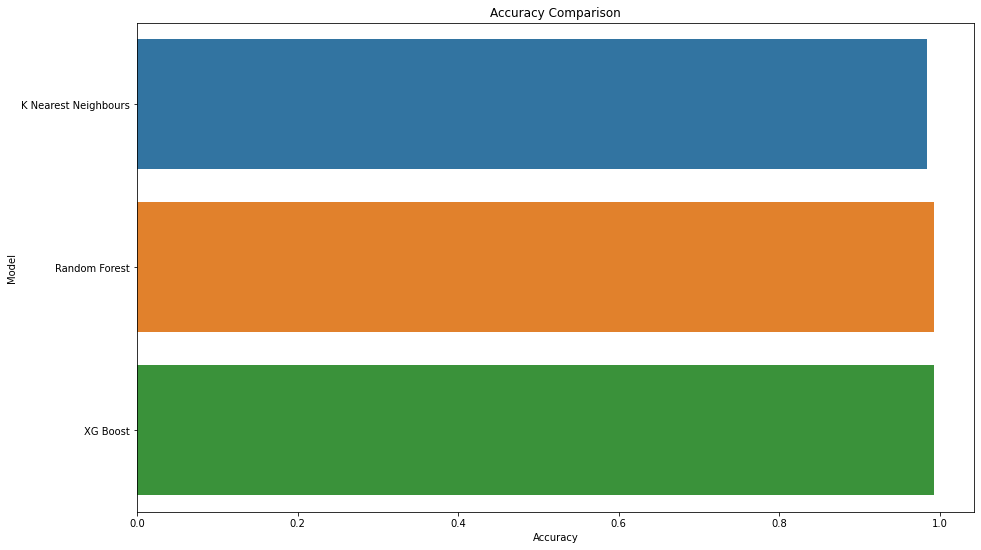

In [33]:
plt.figure(figsize=(15,9))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = acc_value, y = model)
plt.show()

> Using a random forest model

In [18]:
nitrogen = float(input("Input Nitrogen Rate: "))
phosphorous = float(input("Input Phosphorous Rate: "))
pottasium = float(input("Input Pottasium Rate: "))
temperature = float(input("Input Temperature Rate: "))
humidity = float(input("Input Humidity Rate: "))
ph = float(input("Input pH Rate: "))
rainfall = float(input("Input Rainfall: "))

Input Nitrogen Rate: 74
Input Phosphorous Rate: 35
Input Pottasium Rate: 40
Input Temperature Rate: 26
Input Humidity Rate: 80
Input pH Rate: 7
Input Rainfall: 243


In [19]:
prediction = RF.predict([[nitrogen,
                          phosphorous,
                          pottasium,
                          temperature,
                          humidity,
                          ph,
                          rainfall]])
print("Crop Recommendation according to the data is :", prediction)

Crop Recommendation according to the data is : ['rice']
